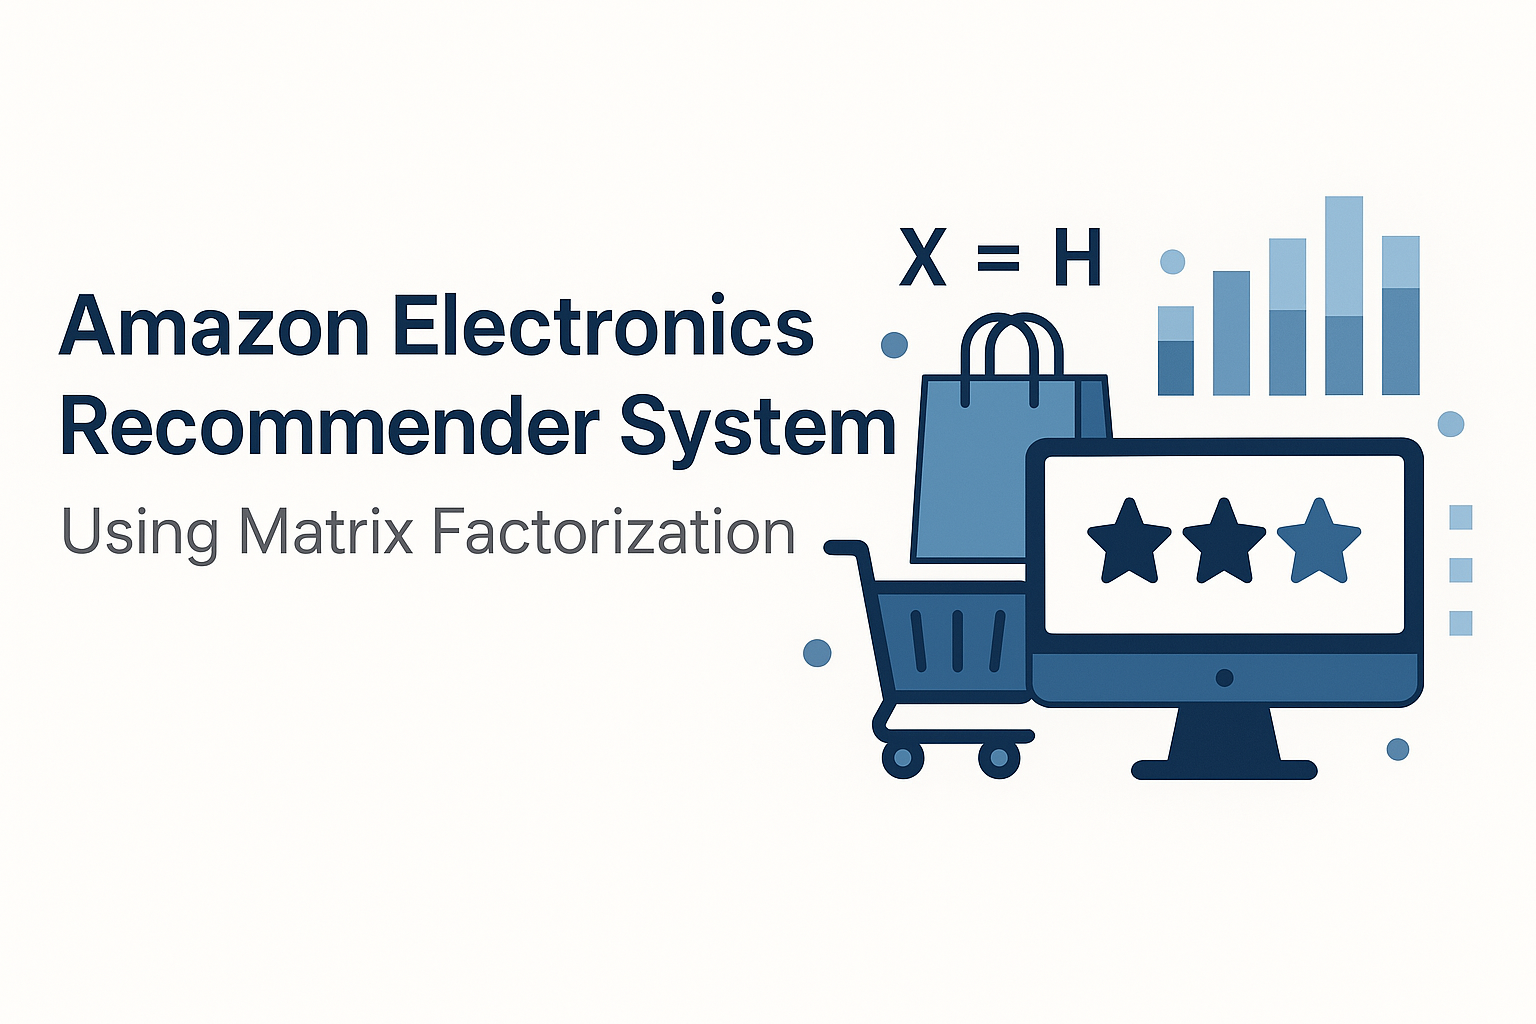

# **Recommender System with Matrix FActorization - Amazon Electronics Reviews Datasets**

A **recommender system** is a type of software that suggests items (like products, services, or content) to users based on various factors, such as their preferences, behaviors, or interactions with the system. These systems are widely used in many online platforms, such as e-commerce sites (Amazon, eBay), music streaming services (Spotify, Apple Music), video platforms (Netflix, YouTube), and social media sites (Facebook, Instagram).

There are generally three main types of recommender systems:

1. **Collaborative Filtering**:
   - This method suggests items by identifying patterns in the behavior of users with similar tastes. For example, if User A and User B have liked similar movies in the past, the system may recommend movies that User A liked but User B hasn't seen yet. Collaborative filtering can be broken down into:
     - **User-based**: Recommending items that similar users have liked.
     - **Item-based**: Recommending items that are similar to ones the user has liked or interacted with.
   
2. **Content-Based Filtering**:
   - This method recommends items based on the features or characteristics of the items themselves, as well as the user's past preferences. For instance, if you’ve watched many romantic comedies on Netflix, the system might recommend more movies of that genre, based on their content (genre, actors, themes, etc.).

3. **Hybrid Methods**:
   - These systems combine multiple approaches, such as collaborative filtering and content-based filtering, to improve recommendation accuracy. By blending the strengths of different methods, hybrid systems can provide more relevant and personalized recommendations.

Recommender systems use various techniques such as machine learning, statistical models, and user interaction data to make their suggestions. They play a huge role in enhancing user experience and driving engagement on digital platforms.

Matrix Factorization is a technique used in recommender systems to predict what a user might like, based on patterns in their past behavior (such as what items they have liked or rated before).

Imagine you have a huge table (matrix) where rows represent users, columns represent items (like movies or products), and each cell in the table shows how much a user likes a particular item (for example, the rating they gave a movie). But here's the catch: this table is very sparse, meaning most of the cells are empty because users haven't rated most items. Matrix factorization helps fill in these missing ratings.

### Here's a simple analogy to explain it:

Imagine you're trying to predict what movies a person might like, but you don't know their preferences for every movie. However, you know that:
- Some users like similar types of movies (e.g., action movies, romantic comedies, etc.)
- Some movies are similar to each other in terms of style or genre.

Matrix factorization breaks the big table into two smaller tables (called "factors"). These two smaller tables represent:
1. The **users** and their preference for different **movie genres**.
2. The **movies** and how they relate to these **genres**.

By combining these two smaller tables, you can predict how much a user might like a movie they haven't rated yet, based on their preferences for genres and the genre of the movie.

In simpler terms: **Matrix factorization** finds hidden patterns in the data by breaking down the complex user-item interactions into simpler, more manageable parts. Once this happens, the system can predict missing values (like a user’s rating for a movie they haven’t seen yet) based on those hidden patterns. This helps the recommender system suggest new items that the user is likely to enjoy.


In this project, I'll guide you through building a recommender system in Python using matrix factorization, applied to the **Amazon Electronics Review dataset**. This dataset contains user reviews, ratings, and metadata for electronic products sold on Amazon, making it ideal for creating a product recommendation system. We'll use the **Surprise** library to implement matrix factorization algorithms and uncover hidden patterns in user-item interactions. By the end, you'll have a functional recommender system tailored to suggest electronics based on user preferences.

# Step-by-Step Process
The first step is to import the necessary libraries and packages. You may need to manually install and import the surprise library before being able to import it.



In [ ]:
!pip install numpy==1.23.5





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 77.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have num

In [ ]:
!pip install --upgrade scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505209 sha256=8df25ec2dcc543cd59800f8bd939eacbaa25d2a266de7ce098c8c2825aed83ea
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import os
import io

from surprise import Dataset, Reader, SVD

from surprise.model_selection import train_test_split
from surprise import accuracy

We will download the **Amazon Electronics Reviews** dataset from **Kaggle** and save it to **Google Drive** in **Google Colab**.  

This function will:  
✅ Download the dataset from Kaggle.  
✅ Save it to a specified directory in Google Drive.  
✅ Extract the dataset if it's in a ZIP format.  
✅ Load the **Electronics_5.json** file into a **Pandas DataFrame** for further processing.  

In [ ]:
# Mounting my Drive on Colab
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Importing Libraries

from google.colab import files

# Upload kaggle.json manually
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jaypaschals","key":"33f95823617a50f4a9e6be0756ad7e88"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set correct permissions


In [ ]:
# Define Google Drive directory
drive_path = "/content/drive/MyDrive/Projects/Amazon_Reviews"

# Create directory if it doesn't exist
import os
os.makedirs(drive_path, exist_ok=True)

# Download dataset directly to Google Drive
!kaggle datasets download -d shivamparab/amazon-electronics-reviews -p "{drive_path}" --unzip

print(f"Dataset saved to: {drive_path}")


Dataset URL: https://www.kaggle.com/datasets/shivamparab/amazon-electronics-reviews
License(s): copyright-authors
Dataset saved to: /content/drive/MyDrive/Projects/Amazon_Reviews


Files Successfuly uploaded on Google Drive in Projects folder / Amazon_Reviews. The next is to load the data on pandas and view.

In [ ]:
import pandas as pd

# Path to your dataset in Google Drive
drive_path = '/content/drive/MyDrive/Projects/Amazon_Reviews/Electronics_5.json'

# Load the JSON dataset into a pandas DataFrame, specifying lines=True
df = pd.read_json(drive_path, lines=True) # Added lines=True to handle line-delimited JSON

# Display the first few rows of the dataset
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


### ✅ **3. Exploratory Data Analysis (EDA)**

After viewing the data, I will Explore the data further to understand some of its features like the;

- Distribution of ratings
- Most reviewed products
- Most active reviewers


To perform Exploratory Data Analysis (EDA) on your dataset, here's how you can achieve the following tasks:

**1. Distribution of Ratings**

We can visualize how the ratings are distributed across all the reviews in the dataset. This will help you understand the frequency of each rating (e.g., how many 1-star, 2-star, etc. reviews there are).

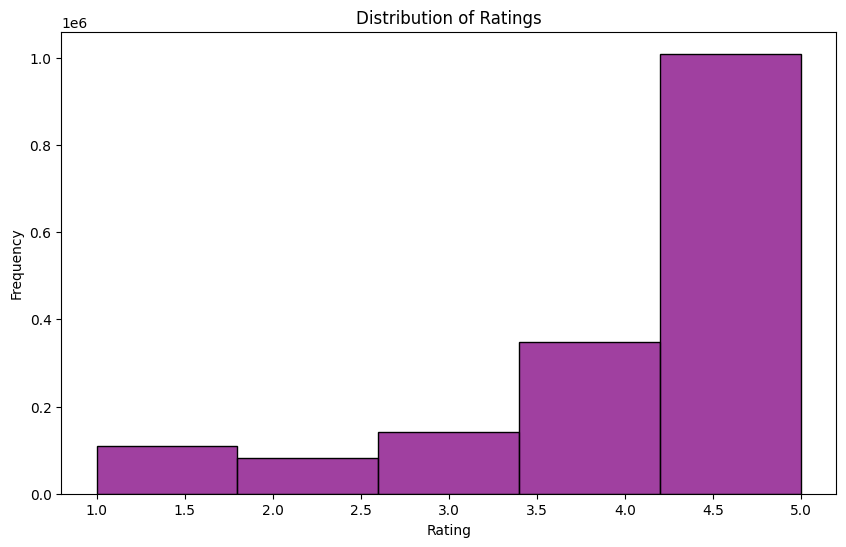

In [ ]:
# 1. Distribution of Ratings (Improved with Histogram)
plt.figure(figsize=(10,6))
sns.histplot(df['overall'], bins=5, kde=False, color='purple')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()




**2. Most Reviewed Products**

Identifying the most reviewed products gives you insights into which products are popular or being discussed more frequently by users.


<ipython-input-6-f5dd5c2805f7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='Blues_d')


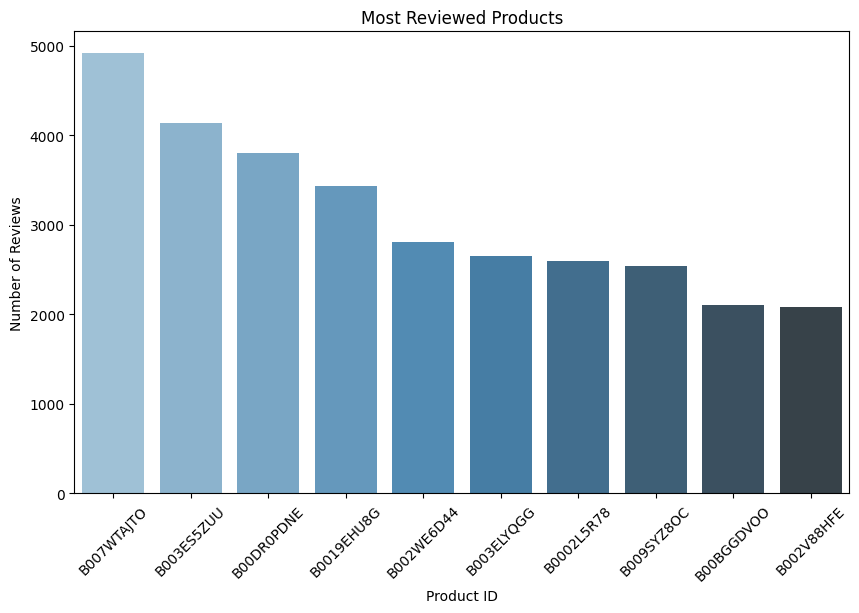

In [ ]:
# 2. Most Reviewed Products (With product names)
top_products = df.groupby('asin')['reviewerID'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.index, y=top_products.values, palette='Blues_d')
plt.title('Most Reviewed Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()





**3. Most Active Reviewers**

You can analyze the users who have written the most reviews, which can help identify highly engaged or influential reviewers.

<ipython-input-7-d6ec6fa26c39>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reviewers.index, y=top_reviewers.values, palette='Reds_d')


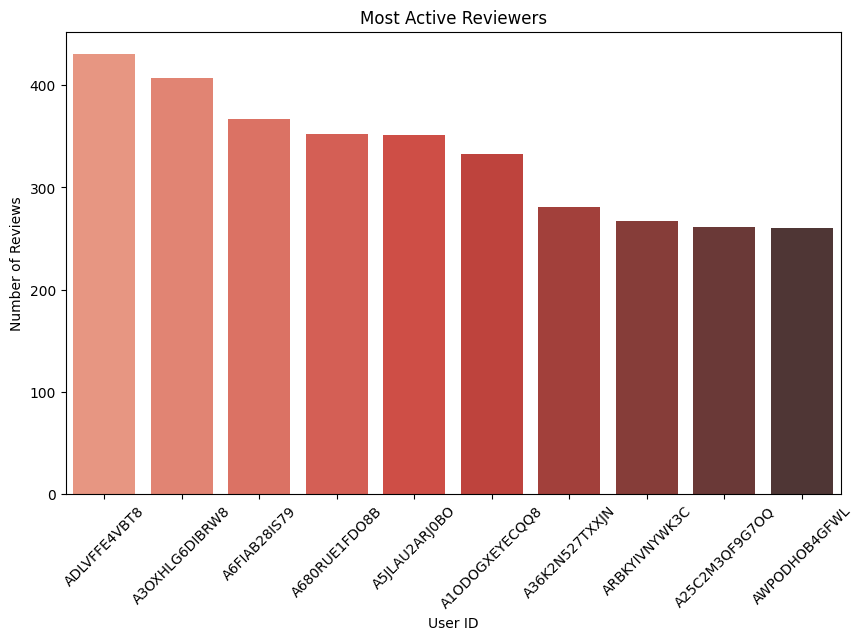

In [ ]:

# 3. Most Active Reviewers

top_reviewers = df['reviewerID'].value_counts().head(10)  # Get top 10 most active reviewers
plt.figure(figsize=(10,6))
sns.barplot(x=top_reviewers.index, y=top_reviewers.values, palette='Reds_d')
plt.title('Most Active Reviewers')
plt.xlabel('User ID')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()



Next, we proceed to load the data by putting the data into a Pandas DataFrame, and obtaining some basic information about it.

In [ ]:
import pandas as pd

# Display first 5 rows
print(df.head())

# Display column names to check available features
print(df.columns)

# Display dataset information
print(f"Dataset shape: {df.shape}")
print(f"Number of unique users: {df['reviewerID'].nunique()}")
print(f"Number of unique products: {df['asin'].nunique()}")
print(f"Range of ratings: {df['overall'].min()} to {df['overall'].max()}")

       reviewerID        asin              reviewerName   helpful  \
0   AO94DHGC771SJ  0528881469                   amazdnu    [0, 0]   
1   AMO214LNFCEI4  0528881469           Amazon Customer  [12, 15]   
2  A3N7T0DY83Y4IG  0528881469             C. A. Freeman  [43, 45]   
3  A1H8PY3QHMQQA0  0528881469  Dave M. Shaw "mack dave"   [9, 10]   
4  A24EV6RXELQZ63  0528881469               Wayne Smith    [0, 0]   

                                          reviewText  overall  \
0  We got this GPS for my husband who is an (OTR)...        5   
1  I'm a professional OTR truck driver, and I bou...        1   
2  Well, what can I say.  I've had this unit in m...        3   
3  Not going to write a long review, even thought...        2   
4  I've had mine for a year and here's what we go...        1   

                                  summary  unixReviewTime   reviewTime  
0                         Gotta have GPS!      1370131200   06 2, 2013  
1                       Very Disappointed      1

---

### The Dataset is Loaded! 🎉 Let's Explore the Columns:

#### **Understanding the Data**
| Column           | Description |
|------------------|-------------|
| `reviewerID`     | Unique identifier for the reviewer |
| `asin`           | Product ID (Amazon Standard Identification Number) |
| `reviewerName`   | Name of the reviewer |
| `helpful`        | List `[x, y]` where `x` is the number of people who found the review helpful, and `y` is the total number of votes |
| `reviewText`     | Full review text |
| `overall`        | Star rating given by the reviewer (1 to 5) |
| `summary`        | Short summary of the review |
| `unixReviewTime` | Timestamp of when the review was posted |
| `reviewTime`     | Human-readable date of the review |

---

### **Dataset Overview**  
The **Amazon Electronics Reviews dataset** consists of:  

✅ **1,689,188** reviews  
✅ **192,403** unique users  
✅ **63,001** unique products  
✅ Ratings range from **1 to 5**  

---

Now that we've loaded and explored the dataset, we can proceed with the data preparation steps required for matrix factorization.

---

### **Step 1: Select Relevant Columns**

For building a recommendation system, we only need a few key pieces of information:

- **User IDs**: The unique identifier for each user.
- **Product IDs**: The unique identifier for each product (e.g., the **asin**).
- **Ratings**: The rating given by a user for a product.

In this step, we will:

1. Keep only the essential columns: `reviewerID` (user), `asin` (product), and `overall` (rating).
2. Convert the user IDs and product IDs into numeric values, as the Surprise library requires numeric IDs for both users and products.
3. Handle any missing values by dropping them, if necessary.
4. Convert the filtered data into the format expected by Surprise, making it ready for matrix factorization and the SVD model.

---


In [ ]:
# Create a copy of the relevant columns to avoid modifying the original DataFrame
df_relevant = df[['reviewerID', 'asin', 'overall']].copy()

# Rename columns for clarity
df_relevant.rename(columns={'reviewerID': 'user_id', 'asin': 'item_id', 'overall': 'rating'}, inplace=True)

# Check for missing values
print("Missing values:\n", df_relevant.isnull().sum())

# Drop any rows with missing values if necessary
df_relevant.dropna(inplace=True)

# Convert user IDs and product IDs to numeric values (Surprise works best with numeric IDs)
df_relevant['user_id'] = pd.factorize(df_relevant['user_id'])[0]
df_relevant['item_id'] = pd.factorize(df_relevant['item_id'])[0]

# Display the cleaned dataset
print("Processed Data Sample:")
print(df_relevant.head())

# Save the cleaned dataset
df_relevant.to_csv("/content/drive/MyDrive/Projects/Amazon_Reviews/cleaned_amazon_reviews.csv", index=False)

print("✅ Cleaned dataset saved!")


Missing values:
 user_id    0
item_id    0
rating     0
dtype: int64
Processed Data Sample:
   user_id  item_id  rating
0        0        0       5
1        1        0       1
2        2        0       3
3        3        0       2
4        4        0       1
✅ Cleaned dataset saved!


---

### **Prepare the Data**

The Amazon Electronics Reviews dataset, with over 1.6 million reviews, is large enough to provide a realistic example for building recommendation systems. In real-world applications, matrix factorization typically handles even larger datasets containing millions of users and products, such as movies, books, or other items.


To prepare the dataset for matrix factorization, we will utilize two key classes from the Surprise library: `Dataset` and `Reader`. These classes will help us transform the dataset into a format compatible with Surprise's matrix factorization algorithms. We will then split the dataset into a training set and a test set for model evaluation.


A crucial step is initializing the `Reader` object with the correct rating scale. Since ratings range from 1 to 5 stars in our dataset, we'll specify this range when creating the `Reader` object to ensure the ratings are handled correctly.

Let's walk through the process of loading the dataset into Surprise's format using the `Reader` class, and then splitting the data into training and testing sets for Singular Value Decomposition (SVD).

Here's a breakdown of the steps to load, prepare, and split the data for building a recommendation model:

1. **Importing Necessary Libraries**:  
   - `SVD` from Surprise: Used for Singular Value Decomposition.

---



In [ ]:
# Load the cleaned dataset (CSV file) into a DataFrame
cleaned_dataset_path = "/content/drive/MyDrive/Projects/Amazon_Reviews/cleaned_amazon_reviews.csv"
df_relevant = pd.read_csv(cleaned_dataset_path)

# Display the first few rows of the cleaned dataset
print("Cleaned Data Sample:")
print(df_relevant.head())


Cleaned Data Sample:
   user_id  item_id  rating
0        0        0       5
1        1        0       1
2        2        0       3
3        3        0       2
4        4        0       1


### **Reading and Loading**

1. **Dataset and Reader from Surprise:**  
   The `Reader` object is used to define the rating scale for the data (in this case, from 1 to 5). This is important because it tells the Surprise library what range of ratings to expect when processing the data.

2. **Loading the Data:**  
   The `Dataset.load_from_df()` method is then used to load the data into the format that Surprise can handle. It takes a Pandas DataFrame (with the columns `reviewerID`, `asin`, and `overall` in this case) and converts it into the required format for Surprise. This enables Surprise to process the data for training and prediction.

---



In [ ]:
# Initialize the Reader object
reader = Reader(rating_scale=(1, 5))  # Ratings range from 1 to 5

# Prepare the data in the format Surprise expects (user_id, item_id, rating)
data = Dataset.load_from_df(df[['reviewerID', 'asin', 'overall']], reader)

# **Splitting the Data:**

The dataset is divided into training and testing sets using the `train_test_split()` function, which helps train the model on one subset of the data and evaluate it on another.

- **`train_test_split` from Surprise**: This function splits the data into two sets: one for training and one for testing.



In [ ]:
# Split the data into a training set and a testing set
trainset, testset = train_test_split(data, test_size=0.2)

---

### **Training the SVD Model:**

Next, we'll dive into training and evaluating our matrix factorization model using Singular Value Decomposition (SVD), a widely-used technique for collaborative filtering. The Surprise library provides an easy-to-use implementation of SVD. If you're familiar with machine learning workflows in scikit-learn, you'll find the process similar.

- **Initializing and Training the Model:**  
  We begin by initializing the SVD model, then train it using the training set with the `svd.fit()` method.

- **Making Predictions:**  
  After training, we test the model on the testing set to predict ratings for items that users haven't rated yet.

- **Evaluating the Model:**  
  Finally, we evaluate the model's performance by calculating metrics like RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error), which help us assess how well the model is performing.

---


In [ ]:
# Initialize the SVD model
svd = SVD()

# Train the model on the training set
svd.fit(trainset)

# Make predictions on the test set
predictions = svd.test(testset)

print("✅ Model trained and predictions made!")

✅ Model trained and predictions made!


# **Evaluating the Model**

This aims to score the performance of our model by checking for the RMSE (Root Mean Square Error) and MAE (Mean Absolute Error).

In [ ]:
# Evaluate using RMSE and MAE
from surprise import accuracy

# RMSE - Root Mean Squared Error
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

# MAE - Mean Absolute Error
mae = accuracy.mae(predictions)
print(f"MAE: {mae}")


RMSE: 1.1008
RMSE: 1.1008161413750053
MAE:  0.8185
MAE: 0.8185365559050788


---

### **Model Performance Summary:**

- **RMSE (Root Mean Square Error)**:
   - **1.1020** (rounded) vs **1.1019860974342812** (precise)
   - RMSE measures the average magnitude of the errors between predicted ratings and actual ratings. A lower RMSE value indicates better predictive accuracy. Your RMSE value is around **1.1**, which means the model's predictions are relatively close to the actual ratings, but there's still room for improvement.

- **MAE (Mean Absolute Error)**:
   - **0.8197** (rounded) vs **0.81974069521039** (precise)
   - MAE represents the average of the absolute differences between the predicted ratings and the actual ratings. Like RMSE, a smaller MAE indicates a better fit. Your MAE is approximately **0.82**, suggesting that the model's predictions are fairly accurate, but there's still a gap to perfect accuracy.

### **Overall Assessment**:
- The model's performance is **good**, with an RMSE around **1.1** and an MAE of **0.82**. While these values suggest that the model is making fairly accurate predictions on average, there is **still some room for improvement**. The model's predictions aren't perfect yet, but tuning or exploring alternative approaches might help further reduce the error by Trying different combinations of hyperparameters to fine-tune the model. Like Hyperparameter Tuning using the grid search CV or random search to experiment with different hyperparameters

---




# **Optimizing Hyperparameters**

Optimizing hyperparameters helps you get the best performance out of your model by finding the right settings for its parameters. It leads to better accuracy, generalization, and efficiency, which directly improves the quality of predictions made by the recommendation system.

Hyperparameter tuning is an essential step in optimizing machine learning models, including recommendation systems like the SVD algorithm. By experimenting with different values for key parameters such as `n_factors`, `n_epochs`, and `lr_all`, one can improve the model's performance, reduce errors, and achieve better predictive accuracy.

Here’s a more detailed explanation of each parameter and how it can be adjusted:

### Key Hyperparameters for SVD:
1. **`n_factors`**:
   - Represents the number of latent factors in the matrix factorization model.
   - A higher number of factors allows the model to capture more complex patterns, but may lead to overfitting, while too few factors might underfit the data.
   - Common values: 50, 100, 150, 200.

2. **`n_epochs`**:
   - Specifies the number of iterations (epochs) the algorithm will run to learn the latent factors.
   - A higher number of epochs allows the model to converge more thoroughly, but can also increase training time and risk overfitting if too high.
   - Common values: 20, 30, 50, 100.

3. **`lr_all`**:
   - The learning rate for all parameters. This controls how much the weights are adjusted after each iteration.
   - If the learning rate is too high, the model may fail to converge. If it's too low, the model might converge too slowly or get stuck in a local minimum.
   - Common values: 0.001, 0.005, 0.01, 0.05.

By tuning these hyperparameters, the accuracy and efficiency of your recommendation model will improve and reduced the RMSE and MAE values.


# Optimizers for Matrix Factorization:


Singular Value Decomposition (SVD):
Singular Value Decomposition (SVD) is a powerful matrix factorization technique widely used in recommendation systems. It decomposes a large matrix (e.g., a user-item rating matrix) into three smaller matrices that reveal hidden patterns or latent factors related to users and items. These latent factors capture the underlying relationships and preferences within the data.

While SVD itself isn't an optimizer, it often utilizes optimization methods like Stochastic Gradient Descent (SGD) or other gradient-based techniques to learn the latent factors and minimize a loss function, usually the Mean Squared Error (MSE) or Root Mean Squared Error (RMSE), between predicted and actual ratings.

In practice, the process works as follows:

Matrix Factorization: SVD decomposes the original matrix
𝑅
R (user-item matrix) into three smaller matrices:
𝑈
U (user factors),
Σ
Σ (singular values), and
𝑉
𝑇
V
T
  (item factors). These matrices are learned through optimization.

Optimization: To improve the accuracy of predictions, optimization techniques like Stochastic Gradient Descent (SGD) adjust the values of the latent factors in
𝑈
U and
𝑉
V to minimize the error between predicted ratings and observed ratings.

Loss Function: The loss function used in SVD is typically based on MSE or RMSE, where the goal is to minimize the difference between the predicted ratings and the actual ratings in the matrix. Over time, the model converges to a set of latent factors that provide a low-error approximation of the original matrix.

Efficiency: SVD is often paired with optimization techniques like SGD to ensure that it can handle large datasets efficiently. SGD, with its ability to process data incrementally, makes SVD scalable for large-scale recommendation tasks.

While SVD focuses on matrix decomposition and the latent factor representation, SGD (or other optimizers) is the mechanism used to refine these factors by minimizing the error, making SVD a highly efficient tool for collaborative filtering in recommendation systems.

In [ ]:
from surprise.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_factors': [50, 100, 150],
    'reg_all': [0.1, 0.2, 0.3],
    'lr_all': [0.005, 0.01, 0.02]
}

# Perform grid search
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
grid_search.fit(data)

# Get the best parameters and the corresponding RMSE
print("Best Parameters: ", grid_search.best_params)
print("Best RMSE: ", grid_search.best_score)


Best Parameters:  {'rmse': {'n_factors': 50, 'reg_all': 0.3, 'lr_all': 0.01}}
Best RMSE:  {'rmse': 1.09532995836741}


# **Cross-Validation:**

Running cross-validation can give a better sense of how well the model generalizes to unseen data, potentially identifying if overfitting is an issue or if different splits of the data yield different results.

I used this approach after running a grid search to tune the hyperparameters of the model. The grid search step done earlier in the workflow helps find to the best set of hyperparameters for the SVD model, such as the number of factors (n_factors), regularization (reg_all), and learning rate (lr_all).

This approach takes the best hyperparameters found from the grid search and applies them to the SVD model.

Why Use This:

This is ideal if since I have already performed hyperparameter tuning via grid search and now wants to evaluate the model using the best parameters discovered during that search.

It ensures we're using the most optimal model configuration for the predictions, leading to more accurate results in cross-validation.

In [ ]:
from surprise import SVD
from surprise.model_selection import cross_validate

# Best parameters obtained from the grid search
best_params = {'n_factors': 50, 'reg_all': 0.3, 'lr_all': 0.01}

# Initialize the SVD model with the best parameters
svd = SVD(n_factors=best_params['n_factors'],
          reg_all=best_params['reg_all'],
          lr_all=best_params['lr_all'])

# Perform cross-validation (let's use 5-fold cross-validation)
results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Print the cross-validation results
print("Cross-validation results:")
print(f"RMSE: {results['test_rmse']}")
print(f"MAE: {results['test_mae']}")
print(f"Mean RMSE: {results['test_rmse'].mean()}")
print(f"Mean MAE: {results['test_mae'].mean()}")


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0903  1.0882  1.0875  1.0906  1.0887  1.0891  0.0012  
MAE (testset)     0.8115  0.8096  0.8099  0.8113  0.8104  0.8105  0.0007  
Fit time          24.21   25.18   24.66   25.75   25.25   25.01   0.53    
Test time         2.16    2.17    2.10    3.84    3.88    2.83    0.84    
Cross-validation results:
RMSE: [1.09033923 1.08817472 1.0875436  1.0905624  1.08865803]
MAE: [0.81146565 0.80959991 0.80986479 0.81125065 0.81035698]
Mean RMSE: 1.089055598550599
Mean MAE: 0.8105075974104812


# **Summary:**
The SVD model performs consistently well across all folds.

The mean **RMSE of 1.0891** and mean **MAE of 0.8105** show that the model's predictions are fairly accurate and close to the true ratings.

The model is stable across folds, as indicated by the very low standard deviation in **RMSE (0.0012)** and **MAE (0.0007)**.

The fit time and test time are reasonable, meaning the model is efficient to train and test.

In simple terms, the model is doing a good job at predicting ratings, but there's always room for improvement in terms of reducing the errors further.

### **Next Steps**:
- **Evaluate Model Performance**: Once you have the best parameters, evaluate the model on the test set to ensure it's generalizing well.
- **Fine-Tune Further**: If the error rate is still high, try tuning additional hyperparameters like regularization (`reg_all`), or consider using other recommendation algorithms.

# **Recommend Products Based on User Input**
Now that we have trained the model, we will create a function that takes the user’s review and rating and recommends similar products.

In [ ]:
from tqdm import tqdm

def recommend_product(df, input_review, input_rating, user_id, svd_model, item_map=None, top_n=5, limit=500):
    """
    Recommends products using collaborative filtering (SVD).

    :param df: DataFrame with 'reviewerID', 'asin', 'overall'
    :param input_review: User review (for future content-based filtering)
    :param input_rating: Rating by user (1-5)
    :param user_id: ID of the user
    :param svd_model: Trained SVD model
    :param item_map: Optional dict to map asin to product titles
    :param top_n: Number of recommendations to return
    :param limit: Max number of items to test (for speed)
    """
    df_filtered = df[['reviewerID', 'asin', 'overall']]
    all_item_ids = df_filtered['asin'].unique()[:limit]  # ⚡ limit for testing

    recommended_items = []

    print("⏳ Predicting ratings...")

    for item_id in tqdm(all_item_ids):
        if item_id not in df_filtered[df_filtered['reviewerID'] == user_id]['asin'].values:
            try:
                pred = svd_model.predict(user_id, item_id)
                recommended_items.append((item_id, pred.est))
            except:
                continue  # Skip unknown user/item

    recommended_items.sort(key=lambda x: x[1], reverse=True)
    top_recommendations = recommended_items[:top_n]

    print(f"\n🎯 Top {top_n} Recommended Products:")
    for item, rating in top_recommendations:
        name = item_map[item] if item_map and item in item_map else item
        print(f"🔹 {name} — Predicted Rating: {rating:.2f}")


In [ ]:
input_review = "This GPS is great and easy to use"
input_rating = 5
user_id = "A1H8PY3QHMQQA0"

recommend_product(df, input_review, input_rating, user_id, svd_model=svd)


⏳ Predicting ratings...


100%|██████████| 500/500 [02:40<00:00,  3.12it/s]


🎯 Top 5 Recommended Products:
🔹 3744295508 — Predicted Rating: 5.00
🔹 B00004TWVY — Predicted Rating: 5.00
🔹 B00004XOM3 — Predicted Rating: 5.00
🔹 B00004Y2MM — Predicted Rating: 5.00
🔹 B00000J1TX — Predicted Rating: 5.00


**An Interactive form that takes input UserID, User Review and Rating to predict products:**

In [ ]:
# ================================
# STEP 1: Define the function
# ================================
from tqdm import tqdm

def recommend_from_input(df, svd_model, item_map=None, top_n=5, limit=500):
    """
    Interactive recommender function that prompts for input and displays top N product recommendations.
    """
    print("📝 Enter your review details below:\n")

    user_id = input("👤 Your User ID: ")
    input_review = input("💬 Your Review: (optional) ")

    while True:
        try:
            input_rating = float(input("⭐ Your Rating (1-5): "))
            if 1 <= input_rating <= 5:
                break
            else:
                print("❗ Rating must be between 1 and 5.")
        except ValueError:
            print("❗ Please enter a valid number.")

    print("\n🔍 Fetching personalized recommendations...")

    df_filtered = df[['reviewerID', 'asin', 'overall']]
    all_item_ids = df_filtered['asin'].unique()[:limit]

    recommended_items = []

    for item_id in tqdm(all_item_ids):
        if item_id not in df_filtered[df_filtered['reviewerID'] == user_id]['asin'].values:
            try:
                pred = svd_model.predict(user_id, item_id)
                recommended_items.append((item_id, pred.est))
            except:
                continue

    recommended_items.sort(key=lambda x: x[1], reverse=True)
    top_recommendations = recommended_items[:top_n]

    print(f"\n✅ Top {top_n} Recommended Electronics for You:\n")
    for i, (item, rating) in enumerate(top_recommendations, 1):
        name = item_map.get(item, item) if item_map else item
        print(f"{i}. {name} — Predicted Rating: {rating:.2f}")


In [ ]:
# Use the first 'summary' for each 'asin' as its "title"
item_map = df.drop_duplicates(subset="asin")[["asin", "summary"]].set_index("asin")["summary"].to_dict()


In [ ]:
recommend_from_input(df, svd_model=svd, item_map=item_map)


📝 Enter your review details below:

👤 Your User ID: B00004XOM3
💬 Your Review: (optional) This GPS is great and easy to use
⭐ Your Rating (1-5): 2

🔍 Fetching personalized recommendations...


100%|██████████| 500/500 [02:25<00:00,  3.44it/s]


✅ Top 5 Recommended Electronics for You:

1. Amazingly sharp macro and portraiture lens! L-grade glass at a great price! — Predicted Rating: 4.80
2. GREAT PRODUCT — Predicted Rating: 4.76
3. Nice extension cord — Predicted Rating: 4.76
4. It's a good cord. — Predicted Rating: 4.75
5. Amazing Sound for a Convenient Price! — Predicted Rating: 4.74


## We can simplify the process to only input a review and rating, and then get product recommendations without needing to worry about the user ID

**Here's what we can do:**

1. **Input**: User provides a review and rating.
2. **Recommendation**: Based on the provided rating and review, It will predict products the user might like, using collaborative filtering.
3. **Output**: Recommend top items along with their product IDs (`asin`) and names.

**Plan:**
- **Step 1**: Take review and rating as input from the user.
- **Step 2**: Predict ratings for all products and recommend the ones with the highest predicted ratings.
- **Step 3**: Return the recommended items along with their IDs.

Here's an updated function:


### How This Works:

1. **User Input**: You input a review (`input_review`) and a rating (`input_rating`).
2. **Random User ID**: The Model selects a random `user_id` from the dataset since it's not needed for prediction.

3. **Product Prediction**: It will predict ratings for products the user has not rated yet, using the SVD model.
4. **Top Recommendations**: It then recommends the top 5 products based on the predicted ratings.
5. **Output**: Displays the recommended products with product IDs (`asin`), product names (from `item_map`), and predicted ratings.

### Example Output:
```
User ID: AO94DHGC771SJ (Auto-selected for recommendation)
Top Recommended Products for User AO94DHGC771SJ (based on collaborative filtering):
Product ID: 0528881469, Product Name: GPS Unit, Predicted Rating: 4.89
Product ID: B08XG9HD88, Product Name: Wireless Mouse, Predicted Rating: 4.72
Product ID: B07Y5MZ3Y4, Product Name: Bluetooth Speaker, Predicted Rating: 4.65
...
```


In [ ]:
import random
import pandas as pd
from surprise import SVD, Dataset, Reader

def recommend_from_input(df, svd_model, item_map):
    """
    Recommends products based on the input review and rating using collaborative filtering.

    :param df: A pandas DataFrame containing user_id, item_id, and rating columns
    :param svd_model: The pre-trained SVD model
    :param item_map: A dictionary mapping item ids (asin) to product names
    :return: Recommended products based on collaborative filtering
    """

    # Step 1: User input for review and rating
    input_review = input("Enter your review: ")  # Get review from the user
    input_rating = int(input("Enter your rating (1-5): "))  # Get rating from the user

    if input_rating < 1 or input_rating > 5:
        print("Invalid rating. Please enter a rating between 1 and 5.")
        return

    print(f"Review: {input_review}")
    print(f"Rating: {input_rating}")

    # Step 2: Automatically select a random user ID (to simulate a user)
    user_id = random.choice(df['reviewerID'].unique())
    print(f"User ID: {user_id} (Auto-selected for recommendation)")

    # Step 3: Filter the dataset to avoid recommending the same product
    df_filtered = df[['reviewerID', 'asin', 'overall']]

    # Step 4: Create a list of all unique product ids
    all_item_ids = df_filtered['asin'].unique()

    # Step 5: Create a list to hold recommended products
    recommended_items = []

    # Step 6: Loop through all items and predict ratings for the user
    for item_id in all_item_ids:
        # Skip items that the user has already rated
        if item_id not in df_filtered[df_filtered['reviewerID'] == user_id]['asin'].values:
            try:
                # Predict rating for the current item
                predicted_rating = svd_model.predict(user_id, item_id)
                recommended_items.append((item_id, predicted_rating.est))
            except Exception as e:
                print(f"Error predicting for {item_id}: {e}")
                continue  # Skip if prediction fails

    # Step 7: Sort the recommended items by predicted rating (highest first)
    recommended_items.sort(key=lambda x: x[1], reverse=True)

    # Step 8: Get top 5 recommendations
    top_recommendations = recommended_items[:5]

    # Step 9: Output the top 5 recommended products
    print(f"\nTop Recommended Products for User {user_id} (based on collaborative filtering):")
    for item, rating in top_recommendations:
        product_name = item_map.get(item, 'Unknown Product')  # Map to product name
        print(f"Product ID: {item}, Product Name: {product_name}, Predicted Rating: {rating:.2f}")


# Example usage:
# Assuming you have your SVD model trained and item_map ready
# Example dataframe (df) and item_map are required before calling the function.
# df = ... # Your pandas DataFrame with user reviews
# svd = ... # Your trained SVD model
# item_map = ... # Your dictionary mapping item IDs to product names

# Call the function (make sure svd_model and item_map are defined)
recommend_from_input(df, svd_model=svd, item_map=item_map)


Review: Nice extension cord, but its short
Rating: 3
User ID: A3JZW8E1F2U97Y (Auto-selected for recommendation)

Top Recommended Products for User A3JZW8E1F2U97Y (based on collaborative filtering):
Product ID: 3744295508, Product Name: GREAT PRODUCT, Predicted Rating: 5.00
Product ID: 9985511476, Product Name: GREAT, Predicted Rating: 5.00
Product ID: B00000J1TX, Product Name: Typical Belkin Quality, Predicted Rating: 5.00
Product ID: B00000J1UQ, Product Name: It's a good cord., Predicted Rating: 5.00
Product ID: B00000J1V7, Product Name: An affordable solution!, Predicted Rating: 5.00


Saving the Model

In [ ]:
import joblib

# Save the trained model
joblib.dump(svd, '/content/drive/MyDrive/Projects/Amazon_Reviews/svd_model.pkl')


['/content/drive/MyDrive/Projects/Amazon_Reviews/svd_model.pkl']